# EDA

In [1]:
import spotipy
from spotipy import SpotifyOAuth
import requests
from app import config
kwargs = {'auth_manager': SpotifyOAuth(username=config.SPOTIFY_USERNAME, scope=config.SPOTIFY_SCOPE) }
sp = spotipy.Spotify(**kwargs)
token = sp.auth_manager.get_access_token(as_dict=False)
session = requests.Session()
session.headers.update({'Authorization': f'Bearer {token}'})

In [2]:
response = session.get(config.API_CURRENT_PLAYING)
result = response.json()
track_id = result['item']['id']
#track_id='77KMttn3Lic7ZQKDlPqp8v'
print('track_id', track_id)

response = session.get(config.API_AUDIO_ANALYSIS + track_id)
result = response.json()
result.keys()
analysis = result

track_id 7kriFJLY2KOhw5en9iI2jb


In [3]:
from pprint import pprint
#pprint(result['meta'])
#print('-' * 30)
#pprint(result['track'])
#print('-' * 30)
#pprint(result['bars'])
#print('-' * 30)
#pprint(result['beats'])
#print('-' * 30)
#pprint(result['sections'])
#print('-' * 30)
#pprint(result['segments'])
#print('-' * 30)
#pprint(result['tatums'])

# Simulate

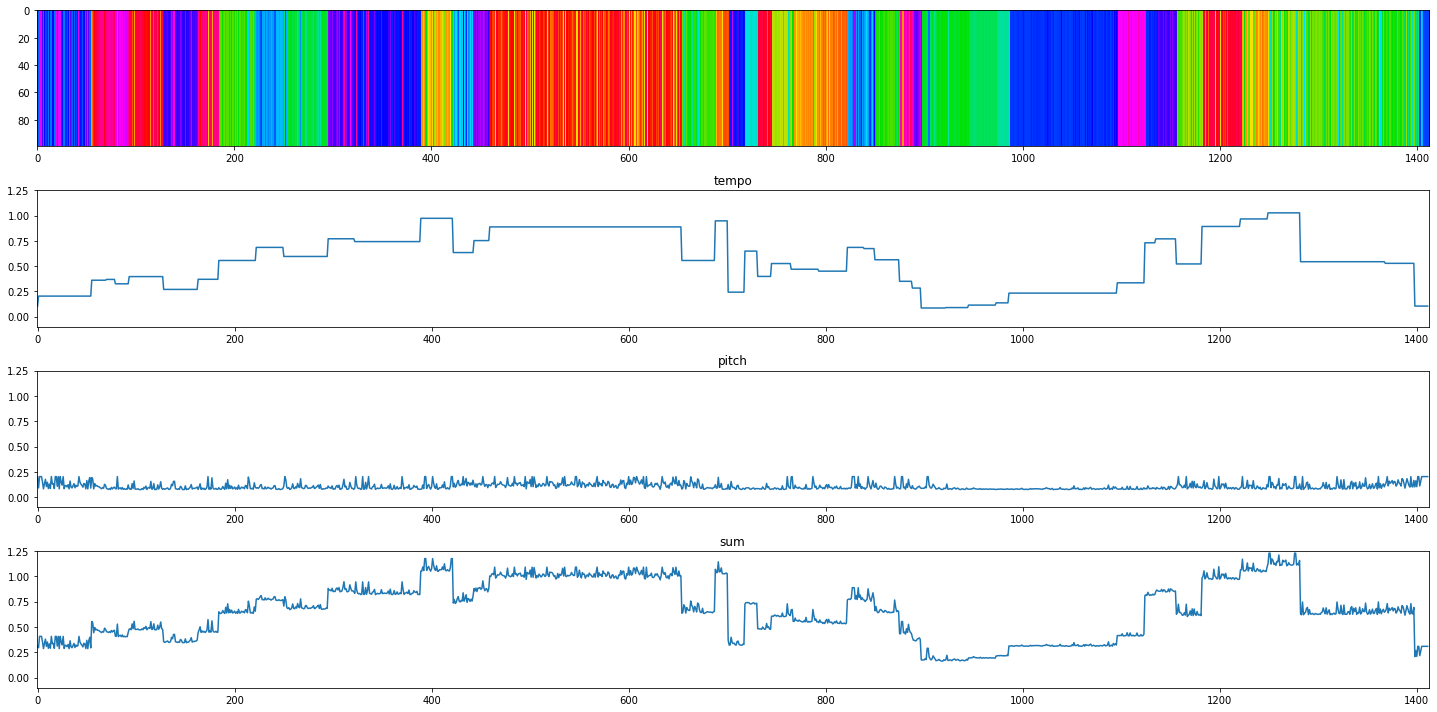

In [4]:

from matplotlib import pyplot as plt
import numpy as np
from app.AnalysisHelper import AnalysisHelper as Helper
from app import AnalysisHelper; import importlib; importlib.reload(AnalysisHelper)

analyzer =  Helper(analysis)
duration = int(analysis['track']['duration'])
view = np.empty(shape=(100, duration, 3))
moments = {}
for t in range(0, duration):
    c = analyzer.get_current_colors(t)
    parts = analyzer.get_color_components(t)
    view[:, t, :] = np.array(c)/255
    for k, v in parts.items():
        if not k in moments:
            moments[k] = []
        moments[k].append(v)

fig, ax = plt.subplots(figsize=(20,10), nrows=len(moments.keys())+1)
ax[0].imshow(view, aspect='auto', interpolation='none')
for i, k in enumerate(moments):
    ax[i+1].plot(np.arange(0, duration), moments[k])
    ax[i+1].set_title(k)
    ax[i+1].set_ylim(-0.1, 1.25)
    ax[i+1].set_xlim(-1, duration)
plt.tight_layout()
plt.show()